In [40]:
%matplotlib widget

import struct
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import IntSlider, VBox, HBox

def read_clustered_data(filename):
    with open(filename, "rb") as f:
        n_clusters = struct.unpack("I", f.read(4))[0]
        n_points = struct.unpack("I", f.read(4))[0]
        n_dim = struct.unpack("I", f.read(4))[0]

        # --- Read centroids ---
        centroid_data = np.zeros((n_clusters, n_dim), dtype=np.float32)
        centroid_ids = np.zeros(n_clusters, dtype=np.int32)
        for i in range(n_clusters):
            centroid_data[i] = np.frombuffer(f.read(4 * n_dim), dtype=np.float32)
            centroid_ids[i] = struct.unpack("i", f.read(4))[0]

        # --- Read points ---
        point_data = np.zeros((n_points, n_dim), dtype=np.float32)
        point_cluster_ids = np.zeros(n_points, dtype=np.int32)
        for i in range(n_points):
            point_data[i] = np.frombuffer(f.read(4 * n_dim), dtype=np.float32)
            point_cluster_ids[i] = struct.unpack("i", f.read(4))[0]

        # DEBUG
        print("n_clusters:", n_clusters)
        print("n_points:", n_points)
        print("n_dim:", n_dim)
        print("point_data shape:", point_data.shape)
        print("centroid_data shape:", centroid_data.shape)

    return point_data, point_cluster_ids, centroid_data, centroid_ids, n_dim

def plot_interactive(points, point_cluster_ids, centroids, centroid_ids, n_dim):
    unique_clusters = np.unique(point_cluster_ids)
    colors = plt.colormaps['tab20'].resampled(len(unique_clusters))

    fig, ax = plt.subplots(figsize=(7, 5))
    scatter = ax.scatter(points[:, 0], points[:, 1], c=point_cluster_ids, cmap=colors, alpha=0.6)
    centroid_plot = ax.scatter(centroids[:, 0], centroids[:, 1], c=centroid_ids, cmap=colors,
                               marker='X', s=150, edgecolor='black')
    ax.set_xlabel(f"Dimension 0")
    ax.set_ylabel(f"Dimension 1")
    ax.set_title("K-means Cluster Visualization")
    ax.grid(True)
    ax.legend(["Points", "Centroids"])

    # Create widgets
    x_slider = IntSlider(value=0, min=0, max=n_dim - 1, description='X Axis')
    y_slider = IntSlider(value=1 if n_dim > 1 else 0, min=0, max=n_dim - 1, description='Y Axis')

    def update_plot(x_dim, y_dim):
        ax.clear()
        ax.scatter(points[:, x_dim], points[:, y_dim], c=point_cluster_ids, cmap=colors, alpha=0.6)
        ax.scatter(centroids[:, x_dim], centroids[:, y_dim], c=centroid_ids, cmap=colors,
                   marker='X', s=150, edgecolor='black')
        ax.set_xlabel(f"Dimension {x_dim}")
        ax.set_ylabel(f"Dimension {y_dim}")
        ax.set_title("K-means Cluster Visualization")
        ax.grid(True)
        ax.legend(["Points", "Centroids"])
        fig.canvas.draw_idle()

    widgets.interactive_output(update_plot, {'x_dim': x_slider, 'y_dim': y_slider})
    display(VBox([HBox([x_slider, y_slider]), fig.canvas]))

n_clusters: 4
n_points: 200
n_dim: 3
point_data shape: (200, 3)
centroid_data shape: (4, 3)


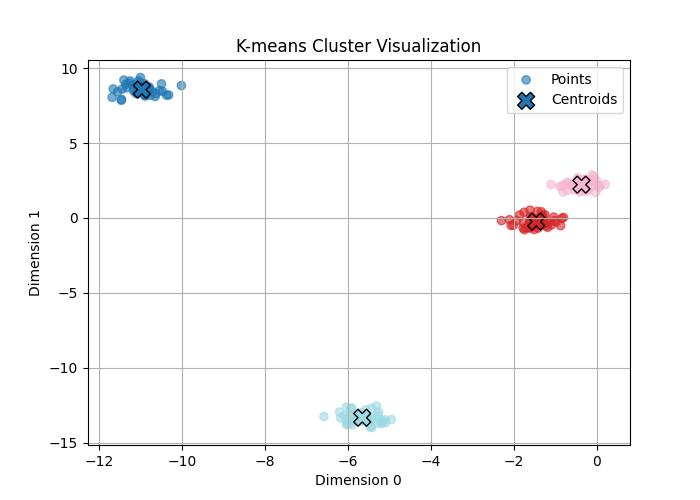

In [41]:
filename = "clustered_data"
points, point_cluster_ids, centroids, centroid_ids, n_dim = read_clustered_data(filename)
plot_interactive(points, point_cluster_ids, centroids, centroid_ids, n_dim)

n_clusters: 4
n_points: 200
n_dim: 3
point_data shape: (200, 3)
centroid_data shape: (4, 3)


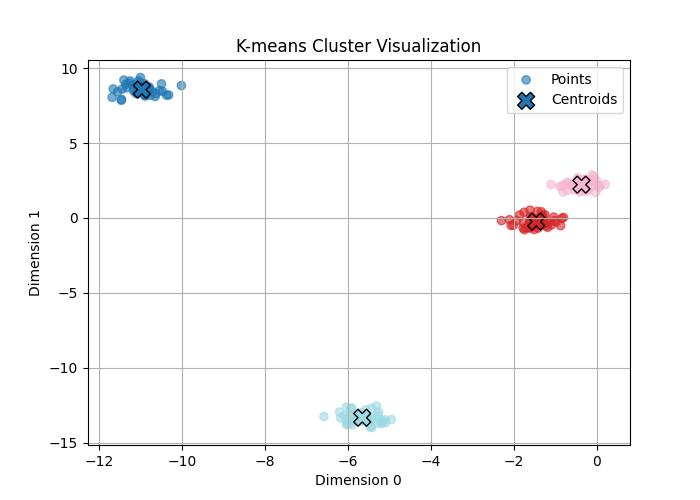

In [ ]:
filename = "clustered_data"
points, point_cluster_ids, centroids, centroid_ids, n_dim = read_clustered_data(filename)
plot_interactive(points, point_cluster_ids, centroids, centroid_ids, n_dim)